## This is a notebook which attempts to demonstrate the feasibility of the best path for the vanilla pollination.
### Take the clean data from "Vanilla_2021_May" notebook.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [4]:
#Create new cols for each date: Flowering locs(>0);Eighty_perc_locs
## O/p df Date; Total flowers; Flow_locs; eighty_locs


#Function for counting locations which are flowering "Flow_locs"
def flocs(x):
    l=len(x[x!=0.0])
    return(l)

#Function for counting minimum no. of locs which have 80% of flowers
def eigtlocs(x):
    if x.sum()==0: #if no new flowers
        l=0
    else:
        y=x.sort_values(ascending=False) #sort in descending to get min locations having max flowers
        c=y.cumsum()
        eightper=c.iloc[-1]*0.8
        if c.iloc[0]>= eightper:
            l=1
        else:
            l=len(c[c<eightper]) #there can be cases where 0 locations have less than 80% because first location holds more than 80%
    return(l)





df1=pd.read_csv('Clean_table.csv')
df2=df1.copy()
#Using.transform with groupby applies the value to all rows of the expanded group.
df2['Total_New']=df2.groupby('Date')['New_flowers'].transform(sum) #New col with sum of flowers each day
#df2[df2['Date']== '23 Apr 20']

#Replace Nan values in the 'New_flowers' column so that 'Flow_locs' and 'Eighty_perc_locs' functions work properly
df2['New_flowers']=df2['New_flowers'].fillna(0)

df2['Flow_locs']=df2.groupby('Date')['New_flowers'].transform(flocs)
df2['Eighty_perc_locs']=df2.groupby('Date')['New_flowers'].transform(eigtlocs)
#df2[df2['Date']== '22 Apr 20'] # For testing against max_flower_date from previous code block

#Clean table grouped by our relevant columns
perc_opt=df2.groupby('Date',sort=False)[['Total_New','Flow_locs','Eighty_perc_locs']].mean()

#Column for focus percentage of locations having 80% of total flowers
perc_opt['day_foc_perc']=perc_opt['Eighty_perc_locs']/perc_opt['Flow_locs']*100

perc_opt.head()
#perc_opt[perc_opt.index=='22 Apr 20']
round(perc_opt['day_foc_perc'].mean(),1) # Mean focus percentage. #49.5%
perc_opt


#There are more optimisation figures which may be relevant:
## 80% holding locs compared with flowering locs of the day : day_foc_perc
## 80% holding locs compared with total flowering locs of the season : seas_foc_perc
## 80% holding locs compared with full walking path(checking for new locs) : grid_foc_perc
seas_locs=len(df1['Location'].unique()) #50 locs in total
perc_opt['day_foc_perc']=perc_opt['Eighty_perc_locs']/perc_opt['Flow_locs']*100
perc_opt['seas_foc_perc']=perc_opt['Eighty_perc_locs']/seas_locs*100
perc_opt['grid_foc_perc']=perc_opt['Eighty_perc_locs']/80*100 #Assuming total of 80 locs in grid 

#perc_opt[perc_opt.index=='22 Apr 20']
perc_opt.reset_index(inplace=True)

In [5]:
#df2[df2['Date']== '18 Mar 20']
#df2[df2['Date']== '18 May 20']
#df2[df2['Date']== '24 May 20']

In [6]:
#perc_opt[perc_opt['Date']=='18 Mar 20']
#perc_opt[perc_opt['Date']=='18 May 20']
#perc_opt[perc_opt['Date']=='29 Apr 20']
perc_opt[perc_opt['Date']=='24 May 20']
#perc_opt

,Date,Total_New,Flow_locs,Eighty_perc_locs,day_foc_perc,seas_foc_perc,grid_foc_perc
71,24 May 20,0.0,0,0,NaN,0.0,0.0


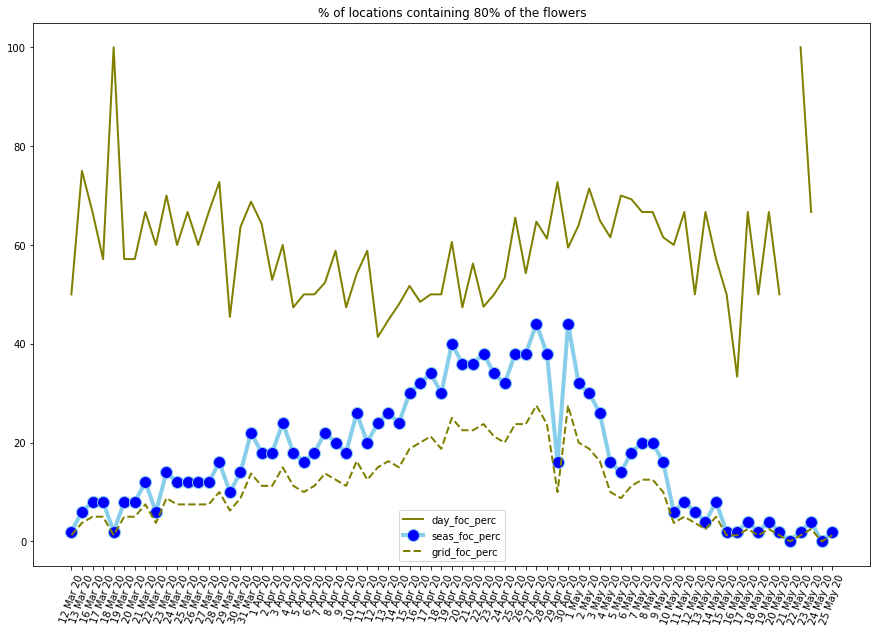

In [7]:
# Create a line graph of day_focus, seas_focus and grid_focus percentages
# multiple line plots
plt.figure(figsize=(15,10))
plt.title('% of locations containing 80% of the flowers')

plt.plot( 'Date', 'day_foc_perc', data=perc_opt, marker='', color='olive', linewidth=2)
plt.plot( 'Date', 'seas_foc_perc', data=perc_opt, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'grid_foc_perc', data=perc_opt, marker='', color='olive', linewidth=2, linestyle='dashed', label="grid_foc_perc")
plt.xticks(rotation=70)


# show legend
plt.legend()

# show graph
plt.show()

## Observations of the above graph
    - As we move towards the peak, with more locations, the % of the locations holding max flwoers(80%) is low.
    - Towards the start and end of the season, with fewer locations, greater % of the locations hold most flowers.The highest are for cases where there is only 1 location and hence 100%
    - 21 May and 24 May are infinity for day focus percentage because no new flowers.

In [8]:
#Average value for the seas_foc_perc which is the most relevant number as demonstrated in the hypothesis. 
sfp=round(perc_opt['seas_foc_perc'].mean(),1) # Mean focus percentage. #17.6%. Most relevant
dfp=round(perc_opt['day_foc_perc'].mean(skipna=True),1) # Mean focus percentage. #59.4%
gfp=round(perc_opt['grid_foc_perc'].mean(),1) # Mean focus percentage. #11%
print("The average season focus percentage is : ", sfp,"%")
print("The average day focus percentage is : ", dfp,"%")
print("The average grid focus percentage is : ", gfp,"%")

The average season focus percentage is :  17.6 %
The average day focus percentage is :  59.4 %
The average grid focus percentage is :  11.0 %


In [30]:
#Create a dataframe which is sorted within a group in descending new_flowers

df2_agg = df2.groupby(['Date','Location']).agg({
    'New_flowers':'sum',
    'Total_New': 'mean',
    'Flow_locs': 'mean',
    'Eighty_perc_locs' : 'mean',

})

g = df2_agg['New_flowers'].groupby('Date', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False))
res=pd.DataFrame(res)
res


#perc_opt[perc_opt.index=='22 Apr 20']
#res[res['Date']== '22 Apr 20'] 
res[res.index=="22 Apr 20"]
#df2_agg.loc['22 Apr 20']
#g = df2_agg[]
                                
#df2.groupby(['Date','Location']).agg({'New_flowers':sum, 'Total_new': mean )


,,New_flowers
Date,Location,
